# V1

## importing libraries

### Canny Edge Detection

In [47]:
import os
import cv2
import numpy as np

def img_to_polygons(image):
    cordnt_list = []

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to create a binary image
    _, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours in the binary image
    contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Extract coordinates of white regions
    white_regions_coordinates = []
    for contour in contours:
        coordinates = contour.squeeze().astype(float).tolist()
        white_regions_coordinates.append(coordinates)

    # Print the coordinates of each white region
    for i, region in enumerate(white_regions_coordinates):
        if type(region[0]) is list:
            if len(region) > 2:
                # Calculate the area of the contour
                area = cv2.contourArea(np.around(np.array([[pnt] for pnt in region])).astype(np.int32))
                if area > 100:
                    # Convert coordinates to the required format
                    crdnts = [{'x': i[0], 'y': i[1]} for i in region]
                    cordnt_list.append(crdnts)

    return cordnt_list

# Set the current working directory
path = os.getcwd()

# Define input and output directories
inputdir = os.path.join(path, "input")
outPut_dir = os.path.join(path, 'output')

# Create the output directory if it doesn't exist
os.makedirs(outPut_dir, exist_ok=True)

# List all files in the input directory
files = os.listdir(inputdir)

# Process each file in the input directory
for file in files:
    # Input and output file paths
    fitem = os.path.join(inputdir, file)
    fout = os.path.join(outPut_dir, file)

    # Read the image using OpenCV
    img = cv2.imread(fitem)

    # Extract polygons from the image
    polygons = img_to_polygons(img)

    # Get the height and width of the image
    height, width = img.shape[:2]

    # Create a black image with the same dimensions as the input
    black_image = np.zeros((height, width, 3), dtype=np.uint8)

    # Draw polygons on the black image
    for ply in polygons:
        ply_list = [[pnt['x'], pnt['y']] for pnt in ply]

        # Define the vertices of the polygon
        vertices = np.array(ply_list, dtype=np.int32)

        # Draw the polygon on the black image
        cv2.polylines(black_image, [vertices], isClosed=True, color=(0, 255, 0), thickness=2)

    # Save the output image
    cv2.imwrite(fout, black_image)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'c:\\waste-management\\input'

# Test

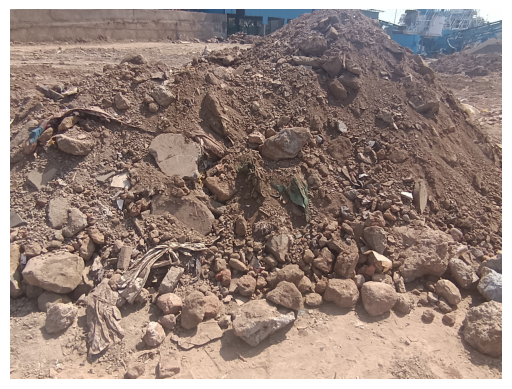

Number of Contours found = 1973


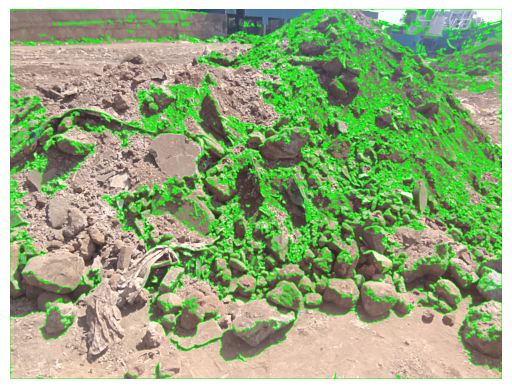

Number of Contours found = 79


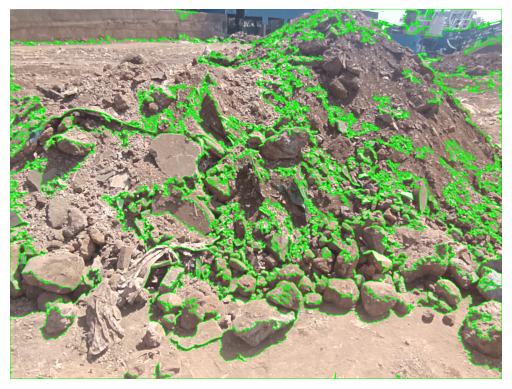

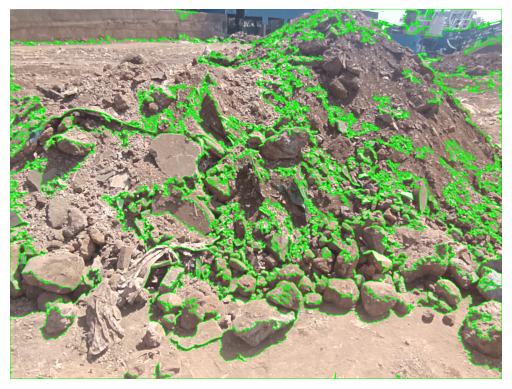

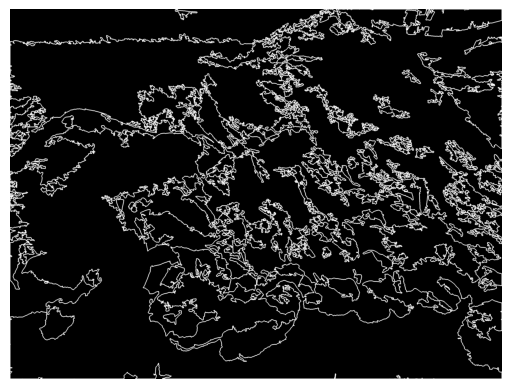

[array([[[1000, 2460]],
 
        [[1000, 2463]],
 
        [[1011, 2463]],
 
        [[1011, 2461]],
 
        [[1007, 2461]],
 
        [[1006, 2460]]], dtype=int32),
 array([[[3273, 2354]],
 
        [[3273, 2362]],
 
        [[3274, 2363]],
 
        [[3279, 2363]],
 
        [[3279, 2356]],
 
        [[3277, 2354]]], dtype=int32),
 array([[[3224, 2191]],
 
        [[3224, 2196]],
 
        [[3226, 2198]],
 
        [[3227, 2198]],
 
        [[3228, 2199]],
 
        [[3229, 2199]],
 
        [[3231, 2201]],
 
        [[3236, 2201]],
 
        [[3236, 2196]],
 
        [[3235, 2195]],
 
        [[3235, 2194]],
 
        [[3233, 2192]],
 
        [[3232, 2192]],
 
        [[3231, 2191]]], dtype=int32),
 array([[[3222, 2184]],
 
        [[3222, 2189]],
 
        [[3229, 2189]],
 
        [[3229, 2185]],
 
        [[3228, 2184]]], dtype=int32),
 array([[[3042, 2179]],
 
        [[3041, 2180]],
 
        [[3041, 2186]],
 
        [[3043, 2188]],
 
        [[3044, 2188]],
 
        [[30

In [ ]:
import os
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt

def show_contours_only(image, contours):
    # Create a black background
    black_background = np.zeros_like(image)

    # Draw contours on the black background
    cv2.drawContours(black_background, contours, -1, (255, 255, 255), 3)

    # Display the black background with white contours
    plt.imshow(cv2.cvtColor(black_background, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide the axis
    plt.show()
def img_to_polygons(image):
    cordnt_list = []
    kernel = np.ones((5, 5), np.uint8) 
    image = cv2.dilate(image, kernel, iterations=1)
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to create a binary image
    _, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours in the binary image
    contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grabcontours(contours)
    print("Number of Contours found = " + str(len(contours))) 
    contours=list(contours)
    image_copy=image.copy()
    cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 3) 
    plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide the axis
    plt.show()
    
    filtered_contours = [contour for contour in contours if cv2.contourArea(contour) >= 2000]
    image_copy=image.copy()

    print("Number of Contours found = " + str(len(filtered_contours))) 
    cv2.drawContours(image_copy, filtered_contours, -1, (0, 255, 0), 3) 
    plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide the axis
    plt.show()

    image_copy=image.copy()
    cv2.drawContours(image_copy, filtered_contours, -1, (0, 255, 0), 3) 
    plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide the axis
    plt.show()

    show_contours_only(image, filtered_contours)
    # # Extract coordinates of white regions
    # white_regions_coordinates = []
    # for contour in contours:
    #     coordinates = contour.squeeze().astype(float).tolist()
    #     white_regions_coordinates.append(coordinates)

    # # Print the coordinates of each white region
    # for i, region in enumerate(white_regions_coordinates):
    #     if type(region[0]) is list:
    #         if len(region) > 2:
    #             # Calculate the area of the contour
    #             area = cv2.contourArea(np.around(np.array([[pnt] for pnt in region])).astype(np.int32))
    #             if area > 100:
    #                 # Convert coordinates to the required format
    #                 crdnts = [{'x': i[0], 'y': i[1]} for i in region]
    #                 cordnt_list.append(crdnts)

    # return cordnt_list
    return contours

# Set the current working directory
image_dir="C:\waste-management\train_images\IMG-20240618-WA0014.jpg"
image=cv2.imread('2.jpeg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide the axis
plt.show()
# cv2.imshow('iamge',image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
img_to_polygons(image)

In [ ]:
a=[1,2,3,4,5,6,7,8,9,10,11,12,13]
for i in a:
    if i%2==0:
        a.remove(i)
    print(a)



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[1, 3, 5, 7, 8, 9, 10, 11, 12, 13]
[1, 3, 5, 7, 9, 10, 11, 12, 13]
[1, 3, 5, 7, 9, 11, 12, 13]
[1, 3, 5, 7, 9, 11, 13]
